<a href="https://colab.research.google.com/github/sravankumar21/CVIP-DataScience/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing Packages***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/breast-cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
print("Column Names:")
print(df.columns)

Column Names:
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
print("Head of the DataFrame:")
print(df.head())

Head of the DataFrame:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  pe

In [ ]:
print("Tail of the DataFrame:")
print(df.tail())

Tail of the DataFrame:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  tex

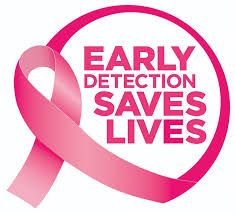

***M = malignant or B = benign,
1 means the cancer is malignant and 0 means benign.***

In [ ]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

train, test = train_test_split(df, test_size = 0.2)

features = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

train_X = train[features]
train_y=train.diagnosis

test_X= test[features]
test_y =test.diagnosis

In [ ]:
model=RandomForestClassifier(n_estimators=100, n_jobs=-1)
model.fit(train_X,train_y)

prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9122807017543859

***Feature importance is a measure of how much each feature contributes to the model's performance in making predictions.***

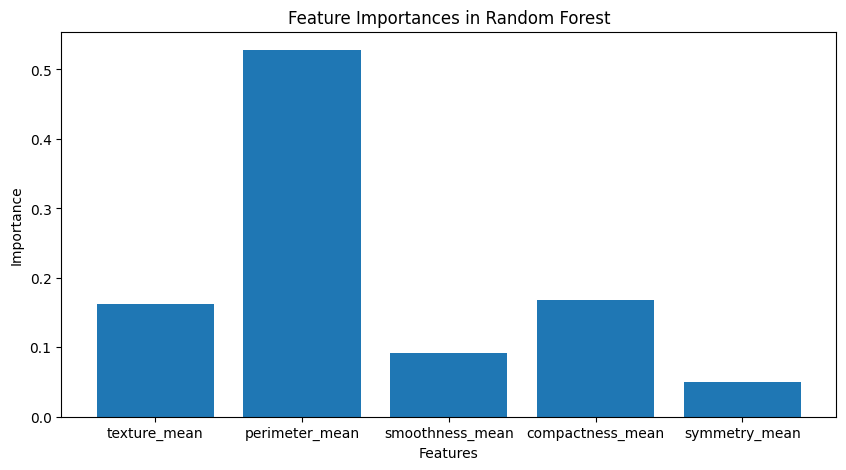

In [ ]:
imp = model.feature_importances_
plt.figure(figsize=(10, 5))
plt.bar(features, imp)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.show()


In [ ]:
def classify_cancer():
    print("Please provide the following information:")
    texture_mean = float(input("Texture Mean: "))
    perimeter_mean = float(input("Perimeter Mean: "))
    smoothness_mean = float(input("Smoothness Mean: "))
    compactness_mean = float(input("Compactness Mean: "))
    symmetry_mean = float(input("Symmetry Mean: "))

    user_data = pd.DataFrame({
        'texture_mean': [texture_mean],
        'perimeter_mean': [perimeter_mean],
        'smoothness_mean': [smoothness_mean],
        'compactness_mean': [compactness_mean],
        'symmetry_mean': [symmetry_mean]
    })
    prediction = model.predict(user_data)

    if prediction[0] == 1:
        print("The person is likely to have cancer.")
    else:
        print("The person is likely to be cancer-free.")
classify_cancer()

Please provide the following information:
Texture Mean: 1
Perimeter Mean: 2
Smoothness Mean: 3
Compactness Mean: 0.2225
Symmetry Mean: 22
The person is likely to be cancer-free.


***What those features actually mean?***

diagnosis: This is the target variable, which indicates the diagnosis of the tumor. It is encoded as 'M' for malignant (cancerous) and 'B' for benign (non-cancerous).

texture_mean: Mean value of grayscale intensity levels in the image of the cell nuclei.

perimeter_mean: Mean value of the perimeter (circumference) of the cell nuclei.

smoothness_mean: Mean value of the local variation in pixel intensity (smoothness) of the cell nuclei.

compactness_mean: Mean value of the compactness, which is computed as (perimeter^2 / area - 1.0) of the cell nuclei.

symmetry_mean: Mean value of symmetry, which measures the symmetry of the cell nuclei.